## Team Members ##

<ul>
    <li>
        Gu Boyuan GUBO0002@e.ntu.edu.sg
    </li>
    <li>
        Feng Zhewen ZFENG006@e.ntu.edu.sg
    </li>
    <li>
        Chen Ling Zheng CHEN1885@e.ntu.edu.sg
    </li>
    <li>
        Chen Jia Wei JCHEN111@e.ntu.edu.sg
    </li>
    <li>
        Chong Kai Ying CHON0226@e.ntu.edu.sg
    </li> 
</ul>

---

## Problem Decomposition Processes ##

### Subproblem: ###

- **Constraints**: Teams must remain within the tutorial group.
- Open the file in Python and convert it into a mutable data structure.
- The first step is to separate the students into their respective tutorial groups using a list, file, or dictionary.
- Create new teams based on the separated data.
- Check the new team members to ensure correct assignment.
- Swap members between teams if needed.
- Export the updated teams into a new CSV file.
---

## Analyzing the Data

### Key Insights:
- **Repeated Names**: Since there are repeated names, they will not be used for analysis or sorting.
- **Schools**: There are **18 different schools** in the dataset.
- **CGPA**: CGPA values only have **58 unique values**, with:
  - **Max CGPA**: 4.97
  - **Min CGPA**: 3.7
- **Gender Distribution**:
  - **Boys**: 2759
  - **Girls**: 3241

---

### School Breakdown:
- **CCDS**: 702 students
- **EEE**: 788 students
- **CoB (NBS)**: 793 students
- **SoH**: 332 students
- **WKW SCI**: 150 students
- **CoE**: 275 students
- **MAE**: 512 students
- **SPMS**: 276 students
- **SBS**: 302 students
- **SSS**: 425 students
- **ASE**: 104 students
- **NIE**: 199 students
- **ADM**: 116 students
- **CCEB**: 465 students
- **MSE**: 156 students
- **LKCMedicine**: 83 students
- **CEE**: 321 students
- **HASS**: 1 student (exception noted below)

**Total**: 6000 students

---

### Exceptions:
1. **HASS**: Only **1 student** from this school (exception).
2. **High Female Ratios**:
   - **TG103**: High girl ratio.
   - **TG28**: High girl ratio.
3. **TG97**: Gender ratio of **34 girls: 16 boys**.

---

# Pseudocode

---


# Student and Split_Student Classes

## Initialize all_grouping
- Create an empty list to store all the student groups.

## Define Classes

### Student Class:
- **Attributes**: `tutorial_group`, `id`, `school`, `name`, `gender`, `cgpa`
- **Constructor (`__init__`)**: Initialize the above attributes when creating a Student instance.

### Split_Student Class:

#### Constructor (`__init__`):
- No parameters other than `self`. (Empty constructor)

#### Method: `split_students_by_school`

**Parameters**: `students`, `**kwargs`

**Action**:
- Create an empty dictionary `sorted_students`.
- For each student in `students`, add the student to the corresponding school list in `sorted_students`.
- Return the `sorted_students` dictionary.

#### Method: `split_students_by_gender`

**Parameters**: `students`, `**kwargs`

**Action**:
- Create a dictionary `sorted_students` with keys `"Male"` and `"Female"`, each containing an empty list.
- For each student in `students`, add the student to the correct gender list in `sorted_students`.
- Remove any empty gender lists.
  
**Check single-gender tutorial groups**:
- If the male list is empty, remove it.
- If the female list is empty, remove it.
  
- Return the `sorted_students` dictionary.

#### Method: `split_students_by_cgpa`

**Parameters**: `students`, `**kwargs`

**Action**:
- Extract the `size` value from `kwargs`.
- Calculate `percentile` as `100 / size`.
- Sort the `students` by `cgpa` in ascending order.
- Create an empty dictionary `sorted_students` for CGPA bands.
- Initialize `band_number` as 0 and calculate the `cutoff` using `percentile` and the total number of students.

**While loop**:
- Create a band for `band_number` by adding students up to the `cutoff` to `sorted_students`.
- Remove the first `cutoff` number of students from `students`.
- If there are no students left, break the loop.
- Increment `band_number`.

- Return the `sorted_students` dictionary.


---

### Pseudocode for Grouping Students

1. **Initialize All Groupings**
   - Set `all_grouping` as an empty list to store all the student groups.

2. **Define Options**
   - Set `school_choices` as the list of schools.
   - Set `gender_choices` as a list containing `"Male"` repeated `number_of_males` times and `"Female"` repeated `(size - number_of_males)` times.
   - Set `cgpa_choices` as a range of numbers from 0 to `size - 1` (representing CGPA bands).

3. **Determine Factor Order**
   - Create a dictionary mapping factors (`"school"`, `"gender"`, `"cgpa"`) to their respective options.
   - Assign `first_choices`, `second_choices`, and `third_choices` based on `factor_order` to set the selection priority.

4. **Track Number of Students Assigned**
   - Initialize `students_assigned` as 0.

5. **Loop Over `number_of_groups` to Create Each Group**

   - **Copy Original Choices**
     - Create `first_choices_not_chosen`, `second_choices_not_chosen`, and `third_choices_not_chosen` as copies of the original choices to track options used for each group.
     - Initialize `current_group` as an empty list.
     - Set `students_selected` to 0.

   - **While `students_selected < size` and `students_assigned < total_students`** (to fill the group):
     
     - **Refresh Choices if Exhausted**
       - If any `*_choices_not_chosen` list is empty, reset it using a deep copy of the original list.

     - **Randomly Select a Choice for Each Factor**
       - Use `random.seed(datetime)` to change the seed each time and increase randomness.
       - Randomly pick one element from `first_choices_not_chosen`, `second_choices_not_chosen`, and `third_choices_not_chosen` and remove them from the lists.

     - **Try to Find a Student**
       - Attempt to get a student matching `first_choice`, `second_choice`, and `third_choice`.
       - If a student is found:
         - Add the student to `current_group`.
         - Remove the student from the `students` data structure.
         - Remove the used choices from `first_choices_not_chosen`, `second_choices_not_chosen`, and `third_choices_not_chosen`.
         - Increment `students_selected` and `students_assigned` by 1.

     - **Handle Selection Failures**
       - If no student is found (due to an `IndexError` or `KeyError`):
         - Remove the current choice from `*_choices_not_chosen` lists as needed.
         - If lists are empty, reset them to their original copies to continue selecting.

6. **After Forming Each Group**
   - Add `current_group` to `all_grouping`.

7. **Return the Result**
   - Return `all_grouping`, which contains all the groups formed.

---


## Student Grouping and Sorting Pseudocode

### Calculate Unique Counts for Each Factor

1. **Calculate Unique Values**:
   - Use `len(set())` on each list to find the unique count of values for each factor:
     ```plaintext
     schools = unique count of schools in students list
     gender = unique count of genders in students list
     cgpa_bands = unique count of CGPA bands in students list
     ```

2. **Determine Factor with Minimum Unique Values**:
   - Use the `min()` function iteratively to find the factor with the least number of unique elements:
     ```plaintext
     factors = { "school": schools, "gender": gender, "cgpa_bands": cgpa_bands }
     first_factor = factor with minimum unique values
     remove first_factor from factors
     second_factor = factor with minimum unique values
     remove second_factor from factors
     third_factor = remaining factor
     ```

---

### Initialize Splitting Function and Sort Students by Factors

1. **Initialize an Instance of Split_Student Class**:
   - Create an instance of the `Split_Student` class, which will be used to split students based on each factor:
     ```plaintext
     splitting_functions = Split_Student()
     ```

2. **Sort Students by First Factor**:
   - Sort students based on the `first_factor`, storing the results in `sorted_students`:
     ```plaintext
     sorted_students = sort students by first_factor using splitting_functions
     ```

3. **Sort by Second and Third Factors**:
   - For each subgroup in `sorted_students`, sort by `second_factor`, and then for each subgroup in this second layer, sort by `third_factor`:
     ```plaintext
     for each subgroup in sorted_students:
         sort by second_factor
     for each subgroup in the second layer of sorted_students:
         sort by third_factor
     ```

---

### Calculate the Total Number of Groups

1. **Calculate Groups**:
   - Divide the total number of students by `size` (the number of students in each team), using `math.ceil` to round up results:
     ```plaintext
     no_of_groups = total number of groups needed
     ```

2. **Define Factor Order and Retrieve Unique Schools**:
   - Define the order of factors and get a list of unique schools:
     ```plaintext
     factor_order = [first_factor, second_factor, third_factor]
     schools = list of unique schools in students list
     ```

---

### Assign Students to Groups Using `choose_students` Function

1. **Group Assignment**:
   - Use the function `choose_students()` to assign students to groups based on sorted criteria, and store the result in `final_grouping`:
     ```plaintext
     final_grouping = choose_students(sorted_students, schools, factor_order, no_of_groups, size)
     ```

---

### Parse CSV File to Create Student Objects and Group Them

1. **Read CSV File**:
   - Open `records.csv`, stripping whitespace and splitting each line by commas.

2. **Create Student Objects**:
   - For each student entry:
     - Retrieve `tutorial_group` and create a `Student` object.
     - If `tutorial_group` exists in `all_tutorial_groups`, append the student to the group; otherwise, create a new entry in the dictionary:
       ```plaintext
       open records.csv file
       student_data = parse each row, excluding header
       for each record in student_data:
           tutorial_group = get tutorial group from record
           student = create Student object with record details
           if tutorial_group exists in all_tutorial_groups:
               append student to the list
           else:
               create new entry for tutorial_group with student in list
       ```

---

### Store Each Tutorial Group's Teams in Final Grouping Dictionary

1. **Initialize Final Grouping Dictionary**:
   - Create `final_grouping` to store each tutorial group’s teams.

2. **Sort Students into Teams**:
   - For each `tutorial_group`, sort students into teams, then add the sorted teams to `final_grouping`:
     ```plaintext
     final_grouping = {}
     for tutorial_group, students in all_tutorial_groups:
         sorted_students = sort_students(students, size)
         final_grouping[tutorial_group] = sorted_students
     ```

---

### Write Final Grouping to CSV File

1. **Open Final CSV File**:
   - Open a new CSV file `final_grouping.csv` in write mode.

2. **Write Header and Team Data**:
   - Write the header row.
   - For each `tutorial_group`:
     - For each `team`:
       - For each `student` in the team, write the student’s details to the file with their assigned team number.
       - Increment the `group_number` after each team is written:
         ```plaintext
         open final_grouping.csv in write mode
         write headers to file
         group_number = 1
         for each tutorial_group, students in final_grouping:
             for each team in students:
                 for each student in team:
                     write student details and team number to file
                 increment group_number by 1
         ```

---

# Main Code 

In [128]:
#imports
import math, random, copy, datetime

In [129]:
#Define Student structure
class Student:
    def __init__(self, tutorial_group, id, school, name, gender, cgpa) -> None:
        """To initialise a student object

        Args:
            tutorial_group (str): Student's class
            id (int): Student indentifier
            school (str): School that student belongs to
            name (str): Name of student
            gender (str): Either Male or Female
            cgpa (float): GPA of the studen
        """
        self.tutorial_group = tutorial_group
        self.id = id
        self.school = school
        self.name = name
        self.gender = gender
        self.cgpa = cgpa

In [130]:
#Class of functions to split students
class Split_Student:

    def __init__(self):
        pass


    #Functions to split students into different categories
    def split_students_by_school(self, students, **kwargs) -> dict:
        """Splits students by school

        Args:
            students (list): List of Student objects to be split

        Returns:
            dict: where key is the school, and the value is a list of students in the school
        """
        #Seperate students by school
        sorted_students = {}

        for student in students:
            if student.school not in sorted_students.keys(): #Current student's school is not recorded yet
                sorted_students[student.school] = [student]

            else: #student's school is already present
                sorted_students[student.school].append(student)

        return sorted_students


    def split_students_by_gender(self, students, **kwargs) -> dict:
        """Splits students by gender

        Args:
            students (list): List of Student objects to be split

        Returns:
            dict: where key is the gender, and the value is a list of students split by gender
        """
        #seperate into male & female
        sorted_students = {"Male":[], "Female":[]}

        for student in students:
            if student.gender == "Male": #if student is male
                sorted_students["Male"].append(student)

            else: #if student is female
                sorted_students["Female"].append(student)


        #If no male or female, remove it from dict
        if len(sorted_students["Male"]) == 0:
            del sorted_students["Male"]

        if len(sorted_students["Female"]) == 0:
            del sorted_students["Female"]

        return sorted_students


    def split_students_by_cgpa(self, students, **kwargs) -> dict:
        """Splits students by cgpa

        Args:
            students (list): List of Student objects to be split
            size (int): size of groups to sort into, expected to be input from kwargs

        Returns:
            dict: dict of where values are students split by cgpa and key their bands.
        """
        #Retrieve number_of_groups input
        size = kwargs["size"]

        #Find the splitting gpa, E.g. mean for 2 teams
        percentile = 100/size

        #Sort students based on cgpa first
        students.sort(key=lambda student: student.cgpa)

        #Split at the various percentiles
        sorted_students = {}
        band_number = 0
        cutoff = math.ceil((percentile/100)*len(students))

        while band_number < size:
            sorted_students[band_number] = students[:cutoff]

            #Remove assgined students from unassigned
            del students[:cutoff]

            #Check if any students left after the deletion, if no exit
            if len(students) == 0:
                break

            #increment band_number
            band_number += 1

        return sorted_students

In [ ]:
#Grouping students into their respective teams 
def choose_students(students, schools, factor_order, number_of_groups, size, number_of_males, total_students) -> list:
    """Splits students into number of groups specified, with balanced teams based on school, gender and cgpa

    Args:
        students (list): list of students splited and sorted by factor order
        schools (list): list of schools that students are from
        factor_order (list): list of which the factors were considered, with first factor considered at index 0
        number_of_groups (int): number of groups to split into
        size (int): Size of groups to sort into
        number_of_males (int): Minimum number of males in each team
        total_students (int): Total number of students

    Returns:
        list: Contains lists, where each list is a group of students
    """
    #Initialise the final grouping list
    all_grouping = []

    #Possible profiles
    school_choices = schools #Schools
    gender_choices = ["Male"]*number_of_males + ["Female"]*(size-number_of_males)
    cgpa_choices = [band for band in range(size)] #GPA bands
    
    
    #Convert the choices in the same order, based on factor order
    choices = {"school": school_choices, "gender": gender_choices, "cgpa": cgpa_choices}

    first_choices = choices[factor_order[0]]
    second_choices = choices[factor_order[1]]
    third_choices = choices[factor_order[2]]


    #Value of Students already assigned
    students_assigned = 0
    
    for grouping in range(number_of_groups):
        #Duplicate the choices so it can be edited, using copy.deepcopy() so it does not affect original copy
        first_choices_not_chosen = copy.deepcopy(first_choices)
        second_choices_not_chosen = copy.deepcopy(second_choices)
        third_choices_not_chosen = copy.deepcopy(third_choices)

        #For each group iteration
        current_group = []
        students_selected = 0
        while students_selected < size and students_assigned < total_students: #Extra check to ensure that once all students are allocated it ends.
        
            #Refresh choices if exhausted
            if len(first_choices_not_chosen) == 0: 
                first_choices_not_chosen = copy.deepcopy(first_choices)
            
            if len(second_choices_not_chosen) == 0: 
                second_choices_not_chosen = copy.deepcopy(second_choices)
            
            if len(third_choices_not_chosen) == 0: 
                third_choices_not_chosen = copy.deepcopy(third_choices)
                
                
            #Select a school
            random.seed(datetime.datetime.now().timestamp()) #Changes seed every time a random choice is made, increasing randomness
            first_choice = random.choice(first_choices_not_chosen) #of those not chosen randomly choose 1


            #Select a Gender
            random.seed(datetime.datetime.now().timestamp()) #Changes seed every time a random choice is made, increasing randomness
            second_choice = random.choice(second_choices_not_chosen) #of those not chosen randomly choose 1


            #Select a cgpa band
            random.seed(datetime.datetime.now().timestamp()) #Changes seed every time a random choice is made, increasing randomness
            third_choice = random.choice(third_choices_not_chosen) #of those not chosen randomly choose 1
            

            try:
                #Extract that student
                chosen_one = students[first_choice][second_choice][third_choice][0] #Take the first one in the chosen profile

                #Remove the chosen student from future choices
                students[first_choice][second_choice][third_choice].remove(chosen_one)
                
                #Prevent repeat of same choice when there are other options
                first_choices_not_chosen.remove(first_choice) 
                second_choices_not_chosen.remove(second_choice) 
                third_choices_not_chosen.remove(third_choice)
                
                
                #Add the chosen student to the group
                current_group.append(chosen_one)

                #Increment the counter  
                students_selected += 1
                students_assigned += 1


            except (IndexError, KeyError) as e:
                #In the event of failure
                #Remove current one only from third layer if not empty
                if len(third_choices_not_chosen) > 1:
                    third_choices_not_chosen.remove(third_choice)
                
                else:
                    #If empty, refresh the list and attempt to remove current second choice
                    third_choices_not_chosen = copy.deepcopy(third_choices)
                    
                    #Attempt to remove second choice
                    if len(second_choices_not_chosen) > 1:
                        second_choices_not_chosen.remove(second_choice) 
                    
                    else:
                        #If empty, refresh the list and attempt to remove current first choice
                        second_choices_not_chosen = copy.deepcopy(second_choices)
                    
                        #Attempt to remove current first choice
                        if len(first_choices_not_chosen) > 1: 
                            first_choices_not_chosen.remove(first_choice) 
                        
                        else:
                            #If empty, start generation afresh                            
                            first_choices_not_chosen = copy.deepcopy(first_choices)
                

        #Add current group to all groups
        all_grouping.append(current_group)


    return all_grouping

In [132]:
#Parent function to execute subfunctions for organising students and grouping into teams
def sort_students(students, size) -> list:
    """Sort students based on School, Gender, CGPA in groups of given size

    Args:
        students (list): List of Student objects
        size (int): Size of groups to sort into

    Returns
        list: list of students sorted into groups of given size
    """
    #Decide order of factors based on unique values
    schools = len(set([student.school for student in students]))
    genders = len(set([student.gender for student in students]))
    cgpa_bands = size #we are splitting gpa bands by number of ppl in each group

    factors = {"school": schools, "gender": genders, "cgpa": cgpa_bands}

    #First factor to consider
    first_factor = min(factors, key=factors.get)
    del factors[first_factor]

    #Second factor to consider
    second_factor = min(factors, key=factors.get)
    del factors[second_factor]

    #Third factor to consider
    third_factor = min(factors, key=factors.get)
    del factors[third_factor]


    #Split and organise students based on order of factors
    spliting_functions = Split_Student()
    #First factor
    sorted_students = getattr(spliting_functions, "split_students_by_" + first_factor)(students, size=size)

    #Second factor
    for first_key, first_value in sorted_students.items(): #Access Second layer
        sorted_students[first_key] = getattr(spliting_functions, "split_students_by_" + second_factor)(first_value, size=size)

    #Third factor
    for first_key, first_value in sorted_students.items(): #Access Second layer
        for second_key,second_value in first_value.items(): #Access Third layer
            sorted_students[first_key][second_key] = getattr(spliting_functions, "split_students_by_" + third_factor)(second_value, size=size)


    #Number of groups
    no_of_groups = math.ceil(len(students)/size) #Rounded up

    #Store the order of factors
    factor_order = [first_factor, second_factor, third_factor]

    #Get unique schools of students
    schools = list(set([student.school for student in students]))
    
    #Get minimum number of males for each team to ensure gender balance
    number_of_males = len([student.gender for student in students if student.gender == "Male"])//no_of_groups

    #Group the students
    final_grouping = choose_students(sorted_students, schools, factor_order, no_of_groups, size, number_of_males, len(students))

    return final_grouping

In [133]:
def main():
    #Extract and split the data
    with open("records.csv", "r") as records:
        student_data = [record.strip().split(",") for record in records.readlines()[1:]] #Removing first row headers

    #Ask the group size from the user
    while True:
        try:
            size = int(input("How many students in each team: ").strip())
            break #Break only if input is converted into an integer

        except ValueError:
            pass

    #Initialize dictionary for all students
    all_tutorial_groups = {}

    #Apply the student class for easier access & move students into their tutorial groups
    for record in student_data:
        #Retrieve tutorial group
        tutorial_group = record[0]

        #Set up student object, attributes order: tutorial_group (str), id (int), school (str), name (str), gender (str), cgpa (float)
        student = Student(record[0],int(record[1]),record[2],record[3],record[4],float(record[5]))

        if tutorial_group in all_tutorial_groups.keys(): #If there was already a student from this group
            all_tutorial_groups[tutorial_group].append(student)

        else: #This tutorial group is not included yet
            all_tutorial_groups[tutorial_group] = [student] #Create new entry, with value being a list containing the student


    #Perform grouping for all students
    final_grouping = {}
    for tutorial_group, students in all_tutorial_groups.items():
        #For us to know progress
        print(f"Currently sorting tutorial group: {tutorial_group}")

        #Sort into their groups
        sorted_students = sort_students(students, size)

        #Store the sorted students
        final_grouping[tutorial_group] = sorted_students


    #Output the final grouping (Parse it back into the orginal csv format)
    group_number = 1
    with open("final_grouping.csv", "w+") as output:
        #Write headers
        output.write("Tutorial_Group,Student ID,School,Name,Gender,CGPA,Team Assigned\n")
        for tutorial_group, students in final_grouping.items():
            for group in students:
                for student in group:
                    output.write(f"{tutorial_group},{student.id},{student.school},{student.name},{student.gender},{student.cgpa},{group_number}\n")

                #Increment group number by 1 after current group is complete
                group_number += 1

In [134]:
if __name__ == "__main__":
    main()

Currently sorting tutorial group: G-1
Currently sorting tutorial group: G-10
Currently sorting tutorial group: G-100
Currently sorting tutorial group: G-101
Currently sorting tutorial group: G-102
Currently sorting tutorial group: G-103
Currently sorting tutorial group: G-104
Currently sorting tutorial group: G-105
Currently sorting tutorial group: G-106
Currently sorting tutorial group: G-107
Currently sorting tutorial group: G-108
Currently sorting tutorial group: G-109
Currently sorting tutorial group: G-11
Currently sorting tutorial group: G-110
Currently sorting tutorial group: G-111
Currently sorting tutorial group: G-112
Currently sorting tutorial group: G-113
Currently sorting tutorial group: G-114
Currently sorting tutorial group: G-115
Currently sorting tutorial group: G-116
Currently sorting tutorial group: G-117
Currently sorting tutorial group: G-118
Currently sorting tutorial group: G-119
Currently sorting tutorial group: G-12
Currently sorting tutorial group: G-120
Curre

---

# Evaluation of Results 

In [135]:
# IMPORTING ALL LIBRARIES
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px

In [136]:
# Import CSV file
# RETURNS ENTIRE CSV AS A LIST OF DICTIONARIES

def r_file(filestr):
    # Parse CSV File
    infile = open(filestr)

    column_names = infile.readline()                          # Save 1st row (column names) in a string
    keys = column_names[0:-1]                                 # Removes /n from string
    keys = keys.split(",")                                    # Save column names as individual elements in list

    number_of_columns = len(keys)                             # Total number of columns in dataset
    data = infile.readlines()                                 # Pull the rest of the csv file

    list_of_rows = list()                                     # Initialise buffer list that temporarily stores all data
    for row in data:                                          # Saves each row as a list inside a list
        row = row[0:-1]                                       # Removes /n from end of string
        list_of_rows.append(row.split(","))                   # Append entire row into list

    infile.close()                                            # Closes CSV file, allows saving of file

    list_of_dictionaries = []                                 # Initialise List that will contain Dictionaries
    for item in list_of_rows:
        row_as_a_dictionary = {}                              # Dictionary Data Type
        for i in range(number_of_columns):
            row_as_a_dictionary[keys[i]] = item[i]            # Key number increments from 0
        list_of_dictionaries.append(row_as_a_dictionary)      # Stores Dictionary into a List

    return(list_of_dictionaries)


In [137]:
# FUNCTION TO RECIEVE USER INPUT + CORRESPONDING DATA

def plotter(filestr):

    # checks for invalid group number entered
    while True:
        try:
            group = int(input("Input tutorial group (if you want to enter G-1, enter 1): "))
            break
        except ValueError:
            print("Invalid group number entered. Try again.")


    # reading new CSV file + all data in dic
    dic_data = r_file(filestr)

    # returns dic of the chosen group
    data_group_chosen = [student for student in dic_data if student["Tutorial_Group"] == f"G-{group}"]
    return data_group_chosen, group

In [138]:
# for generating dot plot

def dot(data_group_chosen, group):
    all_cgpas = [float(student["CGPA"]) for student in data_group_chosen]
    all_student_teams = [student["Team Assigned"] for student in data_group_chosen]

    # combining both data into a new dictionary
    data = [{"CGPA": cgpa, "Team": team} for team, cgpa in zip(all_student_teams, all_cgpas)]

    # create the plot
    fig = px.strip(data, x = "CGPA", y = "Team", title = f"CGPA distribution in each team in Tutorial Group {group}", stripmode = "overlay")

    fig.show()

In [139]:
# function for plotting bar chart for schools
# data only contains that group's member details

def bar_school(data, group):
    #generate the total no. of unique schools
    different_schools_with_repetition = (student["School"] for student in data)
    different_schools = []
    for element in different_schools_with_repetition:
      if element not in different_schools:
        different_schools.append(element)

    #create a dictionary to hold values for each school and put it in a list (should be updated after every team)
    list_of_school_dict = []

    teams_tally_with_repetitions = sorted(student["Team Assigned"] for student in data)

    teams_tally = []

  #retrieve only the unique elements within teams_tally_with_repetitions
    for element in teams_tally_with_repetitions:
      if element not in teams_tally:
        teams_tally.append(element)

      #iterate through all the teams in a tutorial group
    for team in teams_tally:

          #iterate through all different schools in a team of a tutorial group
          dict_school = {school: 0 for school in different_schools}

          # Iterate over each student record
          for student in data:
              # Check if the student is in the current team
              if student["Team Assigned"] == team and student["School"] in dict_school:
                  dict_school[student["School"]] +=1       # Count number of student from each school

          list_of_school_dict.append(dict_school)


      # Step 1: create dic with key with the value being initialised to an empty list initially
    school_counts = {school: [] for school in list_of_school_dict[0]}

      # Step 2: Iterate through each team's dictionary in list_of_school_dict
    for team_dic in list_of_school_dict:
          # Step 3: Append the count for each school to its list
        for school in school_counts:
              school_counts[school].append(team_dic[school])


      # put keys and values from dictionary into lists
    schools = list(school_counts.keys())
    values = [school_counts[school] for school in schools] #list of values corresponding to no. of students in a school in different teams in a bigger list

      #make a list of colors which each school can be assigned to
    colors_to_pick_from = [
          "Red", "Green", "Blue", "Cyan", "Magenta",
          "Yellow", "Black", "Gold", "Orange",
          "Purple", "Pink", "Brown", "Grey",
          "lightblue", "darkred", "darkgreen",
          "navy", "lavender"
      ]

    xpos = list(range(len(teams_tally)))
    barWidth = 0.4
    bottom = [0] * len(teams_tally)  # create a list ten '0's for bottom which will be updated with new value of bottom after iterating through no. of students in each school

    plt.figure(figsize=(20, 7))

    for no_of_students_from_each_school, color, school_name in zip(values, colors_to_pick_from, schools):
        plt.bar(xpos, no_of_students_from_each_school, bottom=bottom, color=color, width=barWidth, label=school_name)
          # update bottom with current value of each school
        bottom = [a + b for a, b in zip(bottom, no_of_students_from_each_school)]  # current no. of students in a school + increase in no. of students for each team

      # adding all labels
    plt.xlabel("Teams Distribution", fontsize = "20")
    plt.ylabel("Number of students", fontsize = "20")
    plt.title(f"School distribution of teams in Tutorial group {group}", fontsize = "30")
    plt.xticks(xpos, teams_tally, fontsize = "15")

      # bbox: x moves legend away by 0.1 away from the edge; y = keeps legend aligned at the top
    plt.legend(bbox_to_anchor = (1.1, 1), loc = "upper left", fontsize = "15")

      # automatically adjust all elements such that they don't overlap
    plt.tight_layout()

    plt.show()



In [140]:
# function for plotting bar chart for gender distribution

def bar_gender(data, group):

    #create a list to hold numbers of girls/guys in each team
    girls_in_tutorial_group =[]
    guys_in_tutorial_group =[]

    #creates list of all possible unique teams in the tutorial group we are checking
    teams_tally = set(student["Team Assigned"] for student in data) #set ensures that all the elements generated are unique
    teams_tally = sorted(teams_tally) #cite stackoverflow

    for team in teams_tally:
        female_count = 0  # Resets to 0 for each team
        male_count = 0    # Resets to 0 for each team

        # Iterate over each student record
        for student in data:
            # Check if the student is in the specified tutorial group and the current team
            if student["Team Assigned"] == team:
                # Count female and male students
                if student["Gender"]== "Female":
                    female_count += 1
                elif student["Gender"]== "Male":
                    male_count += 1

        # Append the counts for this team to the respective lists
        girls_in_tutorial_group.append(female_count)
        guys_in_tutorial_group.append(male_count)

    #plot data for girls
    xpos = list(range(len(girls_in_tutorial_group)))
    plt.figure(figsize=(10, 7))
    barWidth = 0.3
    plt.bar (xpos,girls_in_tutorial_group,color='red',width = barWidth,label = 'Females')

    #plot data for guys
    plt.bar([x + barWidth for x in xpos], guys_in_tutorial_group, color='blue', width=barWidth, label="Males")

    # x-axis label, y-axis label, and legend respectively
    plt.xlabel('Teams')
    plt.ylabel('Number of Each Gender')
    plt.legend()

    # Labeling for each team in the tutorial group
    plt.xticks([x + barWidth / 2 for x in xpos], teams_tally)


    #naming our graph
    plt.title(f"Gender distribution per team in Tutorial Group {group}")



In [141]:
def main_graph():
    write_filstr = "final_grouping.csv"
    data_group_chosen, group = plotter(write_filstr)

    # generating dot plots
    dot(data_group_chosen, group)

    # generating bar charts
    bar_school(data_group_chosen, group)
    bar_gender(data_group_chosen, group)
    

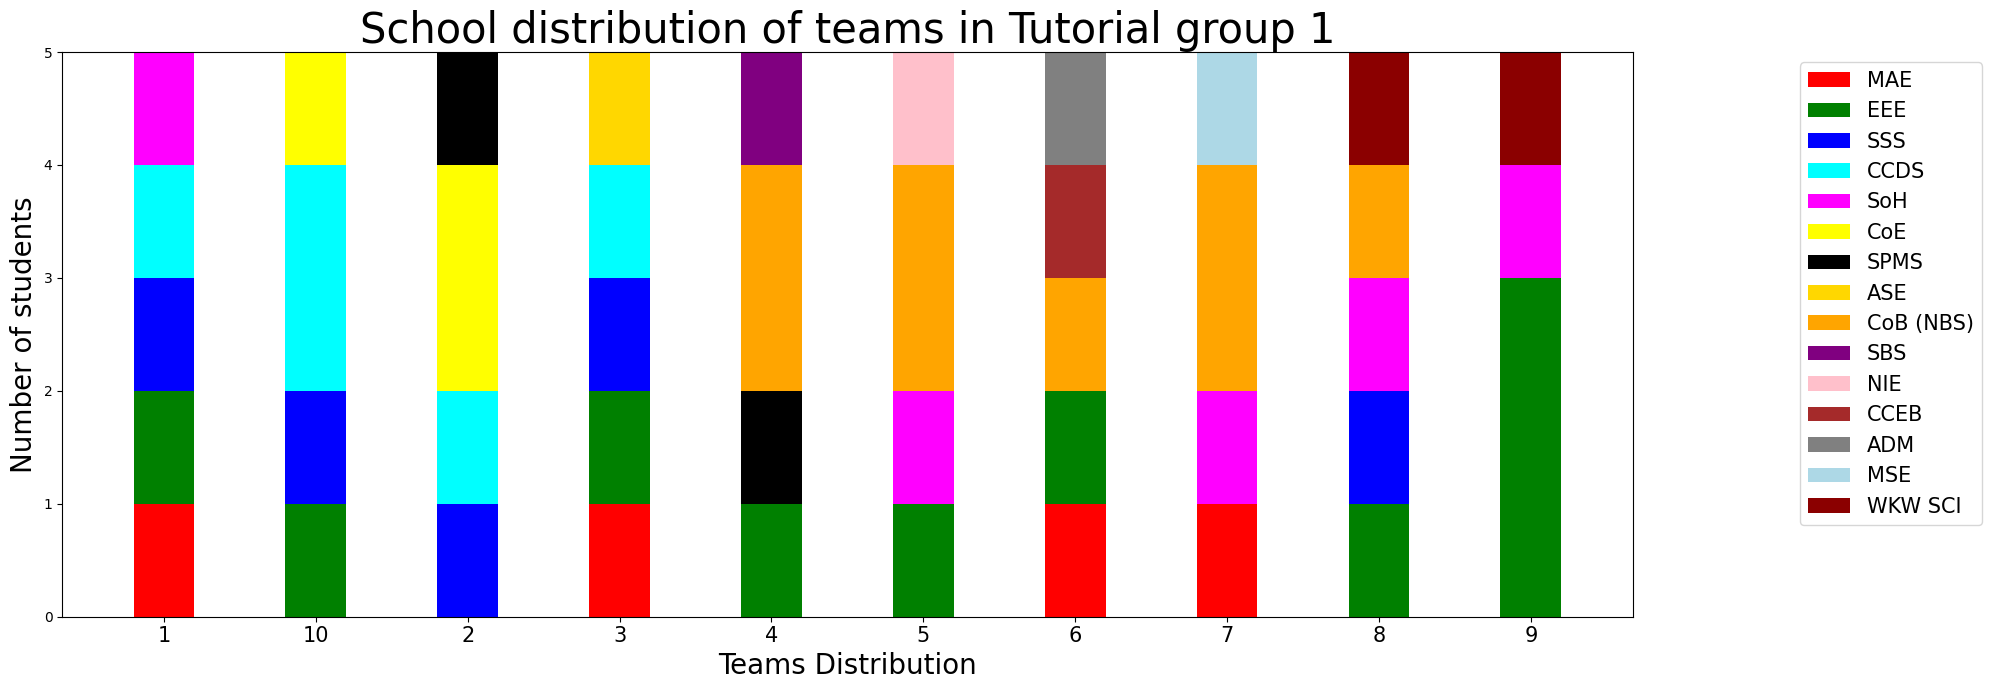

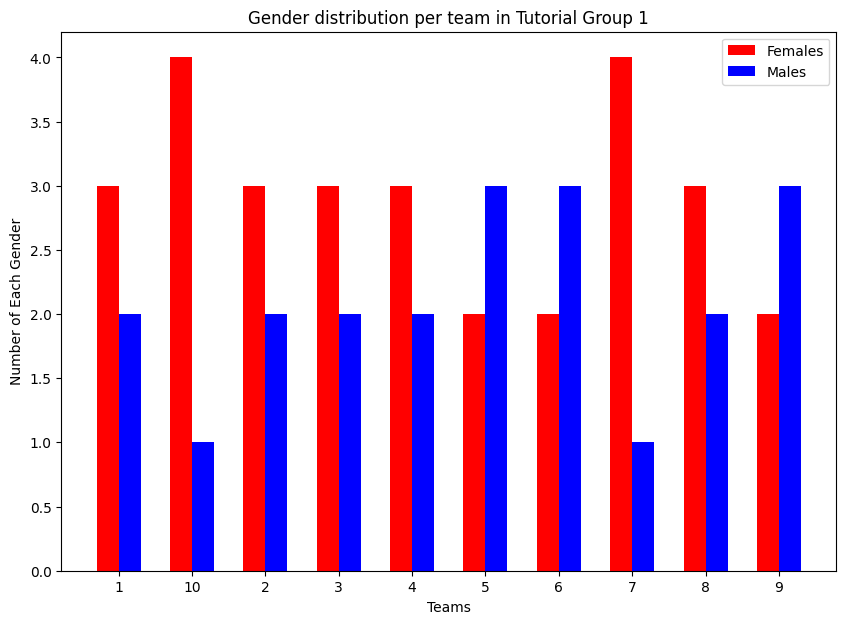

In [142]:
if __name__ == "__main__":
    main_graph()

![CGPA Distribution](./assets/images/cgpa_distribution.png)

![School Distribution](./assets/images/school_distribution.png)

![Gender Distribution](./assets/images/gender_distribution.png)

---

# Challenges & Solution

---

### Challenge: Handling Empty Groups (Gender Splitting)
- **Problem**: Some M/F groups may have no students, leading to empty groupings.
- **Solution**: The `split_students_by_gender` method checks for empty gender lists and removes irrelevant groups:
    - If the male list is empty, it is removed.
    - If the female list is empty, it is removed.
    This ensures only non-empty gender groups remain, making the output cleaner.

---

### Challenge: Managing Group Sizes (CGPA Splitting)
- **Problem**: When dividing students by CGPA, groups can become uneven if the number of students isn't perfectly divisible by the desired number of groups.
- **Solution**: The code calculates the number of students per CGPA group using `cutoff = CEILING((percentile / 100) * LENGTH(students))`. This ensures that each group has at least the intended minimum number of students, even if the group sizes vary slightly. For example, with 23 students and 4 CGPA groups, the cutoff becomes 5.75 (25% of 23), which rounds up to 6, keeping group sizes balanced.

---

### Challenge: Handling Edge Cases (CGPA Splitting)
- **Problem**: With fewer students than groups, some groups may end up empty.
- **Solution**: The while loop (`WHILE band_number < size`) ensures students are distributed into available groups, leaving empty groups if there are fewer students than groups. This prevents errors and ensures smooth execution.
**Challenge:** 
Initially, students were ordered by `school -> cgpa -> gender`, but this led to a lack of student diversity for the last few tutorial groups, as they had a majority of males/females.

**Solution:** 
A function `sort_students()` was created to reorganize the 3 factors (`school`, `gender`, `cgpa`). The function splits students starting from the factor with the least number of unique elements and progresses to the factor with the most number of unique elements. 

This approach ensures greater diversity, as more students are available for selection when moving to the next factor, promoting diversity even towards the end of the sorting process.

---
# Improving Randomness in Random Number Generation

### Initial Approach: Using `random.random()`
- Initially, we used `random.random()` to generate random values.
- This method wasn’t truly random because the generated numbers followed a predictable distribution.
- As a result, the sequence of values could be reproduced, making the randomness appear fixed.




          ### Improved Approach: Using `random.seed()` with Current Timestamp
- We switched to using `random.seed()` with `datetime.datetime.now().timestamp()` to increase randomness.

#### How It Works:
1. **Generate Timestamp**: 
   - `datetime.datetime.now().timestamp()` provides the current timestamp, which represents a specific point in time, including fractional seconds.
   
2. **Use Timestamp as Seed**:
   - We use this timestamp as the seed for `random.seed()`.
   - By seeding the random number generator with the current timestamp, each run of the program produces a different sequence of random numbers.

---

### Benefit of Using `random.seed()` with Timestamp
- This approach introduces true randomness, as the sequence of random numbers will differ each time the program runs, based on the current timestamp.

# Handling Imbalance in Student Distribution Across Schools and Genders

### Problem: Imbalance in the Number of Students
- Due to an imbalance in the number of students across different schools and genders:
  - Some schools or genders may end up with no profiles/students after rounds of selection.
- Using `deepcopy` to copy the original list can lead to issues when using `random.choice`:
  - If `random.choice` selects a school or gender with an empty profile, this results in a `KeyError`.

---

### Solution: Using `TryExcept` Handling
To address this issue, we use a `try-except` block to manage errors that may occur due to empty selections.

1. **Handle Potential Errors**:
   - If an `IndexError` or `KeyError` occurs during selection:
     - Remove the current choice from `*_choices_not_chosen` lists as needed to prevent repeated errors.

2. **Reset Lists When Empty**:
   - If the lists are entirely empty, reset them to their original copies using `deepcopy`.
   - Continue the selection process with the reset lists.

---



### Benefits of This Approach
- This method ensures that empty selections do not cause the program to crash.
- By resetting lists as needed, the program can continue selecting students even when certain schools or genders have limited profiles available.

**Challenge:** 
Initially, students were ordered by `school -> cgpa -> gender`, but this led to a lack of student diversity for the last few tutorial groups, as they had a majority of males/females.

**Solution:** 
A function `sort_students()` was created to reorganize the 3 factors (`school`, `gender`, `cgpa`). The function splits students starting from the factor with the least number of unique elements and progresses to the factor with the most number of unique elements. 

This approach ensures greater diversity, as more students are available for selection when moving to the next factor, promoting diversity even towards the end of the sorting process.



---


      ████████╗██╗  ██╗ █████╗ ███╗   ██╗██╗  ██╗    ██╗   ██╗ ██████╗ ██╗   ██╗
      ╚══██╔══╝██║  ██║██╔══██╗████╗  ██║██║ ██╔╝    ╚██╗ ██╔╝██╔═══██╗██║   ██║
         ██║   ███████║███████║██╔██╗ ██║█████╔╝      ╚████╔╝ ██║   ██║██║   ██║
         ██║   ██╔══██║██╔══██║██║╚██╗██║██╔═██╗       ╚██╔╝  ██║   ██║██║   ██║
         ██║   ██║  ██║██║  ██║██║ ╚████║██║  ██╗       ██║   ╚██████╔╝╚██████╔╝
         ╚═╝   ╚═╝  ╚═╝╚═╝  ╚═╝╚═╝  ╚═══╝╚═╝  ╚═╝       ╚═╝    ╚═════╝  ╚═════╝ 
